In [1]:
import pandas as pd
import numpy as np
import openpyxl as xl
import numpy as np
import matplotlib.pyplot as plt
import requests
% matplotlib inline

In [2]:
oil_data_to_load = 'C:/Users/Sal/Desktop/Oil_Project/Eagle_Ford.xlsx'

In [3]:
# Read Oil Pandas Data Frames
oil_data_df = pd.read_excel(oil_data_to_load)

In [4]:
oil_data_df.head()

,API,Longitude,Latitude,Bottomhole longitude,Bottomhole latitude,Well Number,Lease Name,Well Type,Permit Type,Pad,...,IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe),bi Oil,Di Oil (per month),Dmin Oil (per year),bi Gas,Di Gas (per month),Dmin Gas (per year)
0,42013342710000,-98.332847,28.954002,-98.331992,28.942858,1H,Little L & C,Oil,Horizontal,No,...,89.77,0.082,0.043,0.090,1.59,0.22,0.1,0.59,0.10,0.05
1,42013342730000,-98.455662,28.728584,-98.448771,28.714850,2H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
2,42013342780000,-98.470619,28.698830,-98.470619,28.698830,1H,Peeler Ranch,Oil,Horizontal,No,...,287.40,0.172,0.120,0.193,0.80,0.21,0.1,1.40,0.34,0.05
3,42013342790000,-98.450319,28.726421,-98.440780,28.715775,11H,Peeler Ranch,Oil,Horizontal,No,...,64.09,0.053,0.156,0.081,1.84,0.21,0.1,2.74,1.00,0.05
4,42013342850000,-98.439686,28.734653,-98.430205,28.724640,1H,Peeler Ranch Unit,Oil,Horizontal,No,...,139.48,0.105,0.119,0.125,1.24,0.19,0.1,1.86,1.00,0.05


In [5]:
# Drop all rows with missing information
cleaned_oil_df = oil_data_df.dropna(how='any')

In [7]:
cleaned_oil_df.head(5)

,API,Longitude,Latitude,Bottomhole longitude,Bottomhole latitude,Well Number,Lease Name,Well Type,Permit Type,Pad,...,IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe),bi Oil,Di Oil (per month),Dmin Oil (per year),bi Gas,Di Gas (per month),Dmin Gas (per year)
36,42013343510000,-98.179695,28.780553,-98.190989,28.795153,22H,Emma Tartt,Oil,Horizontal,Yes,...,169.56,0.095,0.195,0.129,1.18,0.24,0.1,1.87,0.33,0.05
67,42013343920000,-98.173404,28.784862,-98.188026,28.798432,20H,Emma Tartt,Oil,Horizontal,Yes,...,169.56,0.095,0.195,0.129,1.18,0.24,0.1,1.87,0.33,0.05
68,42013343940000,-98.300092,28.939989,-98.308722,28.949717,1H,Flores Unit,Oil,Horizontal,No,...,270.78,0.099,0.082,0.113,1.38,0.74,0.1,1.30,0.65,0.05
90,42013344250000,-98.152263,28.778206,-98.143652,28.768274,1H,Stewart-Finley Unit,Oil,Horizontal,No,...,300.22,0.114,0.147,0.138,0.92,0.32,0.1,1.63,1.00,0.05
93,42013344280000,-98.631494,28.800631,-98.635346,28.813147,1H,Beck Unit,Oil,Horizontal,No,...,227.45,0.151,0.051,0.163,1.17,0.24,0.1,0.82,0.18,0.05


In [10]:
#Show mulitple specific columns--note the extra brackets
cleaned_oil_df[["API", "Longitude","Latitude","Well Number","Well Type","Operator","Sub-play","Well Cost Total (US$)","EUR Total (mmboe)",'Cum365 Gas (mcf)',"Drilling Speed (m/day)"]].head(5)

,API,Longitude,Latitude,Well Number,Well Type,Operator,Sub-play,Well Cost Total (US$),EUR Total (mmboe),Cum365 Gas (mcf),Drilling Speed (m/day)
36,42013343510000,-98.179695,28.780553,22H,Oil,ExxonMobil,Karnes Trough,6466931.0,0.129,37592.0,183.17
67,42013343920000,-98.173404,28.784862,20H,Oil,ExxonMobil,Karnes Trough,5564731.0,0.129,37592.0,217.42
68,42013343940000,-98.300092,28.939989,1H,Oil,Earthstone Energy,Black Oil,3847818.0,0.113,29573.0,132.94
90,42013344250000,-98.152263,28.778206,1H,Oil,Marathon Oil,Karnes Trough,7150483.0,0.138,41831.0,231.51
93,42013344280000,-98.631494,28.800631,1H,Oil,Earthstone Energy,Black Oil,4930074.0,0.163,18106.0,76.22


In [11]:
#avg rig cost varabilable by subplay
rig_cost = cleaned_oil_df["Rig Cost (US$)"]
measured_depth = cleaned_oil_df["Measured Depth (m)"]
#rig cost by measured depth
rig_cost_by_measured_depth = rig_cost / measured_depth

In [12]:
# Build cost data frame# Build 
cost_df = pd.DataFrame({
                       'Sub-play':cleaned_oil_df['Sub-play'],
                       'County':cleaned_oil_df['County'],
                       'Well Cost Total (US$)':cleaned_oil_df['Well Cost Total (US$)'],
                       'Rig Cost (US$)':cleaned_oil_df['Rig Cost (US$)'],
                       'Water Cost (US$)':cleaned_oil_df['Water Cost (US$)'],
                       'Proppant Cost (US$)':cleaned_oil_df['Proppant Cost (US$)'],
                       'Pumping Cost (US$)':cleaned_oil_df['Pumping Cost (US$)'],
                       'Other Cost (US$)':cleaned_oil_df['Other Cost (US$)'],
                       'Lateral Length (m)': cleaned_oil_df['Lateral Length (m)'],
                       'Vertical Depth (m)': cleaned_oil_df['Vertical Depth (m)'],
                       'Measured Depth (m)': cleaned_oil_df['Measured Depth (m)'],
                       'EUR Total (mmboe)': cleaned_oil_df['EUR Total (mmboe)'],
                       'Cum365 Total (boe)': cleaned_oil_df['Cum365 Total (boe)'],
                       "Rig cost by depth": rig_cost_by_measured_depth
                       })

In [14]:
# Calculate average costs# Calcu 
cost_avg = cost_df.groupby('Sub-play').mean()

In [15]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
Sub-play,,,,,,,,,,,,
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713


In [16]:
cost_avg.sort_values('Well Cost Total (US$)', ascending = False, inplace = True)
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth
Sub-play,,,,,,,,,,,,
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962


In [18]:
well_cost_sum = cost_avg['Well Cost Total (US$)'].sum()
well_cost_sum

42815641.185027376

In [20]:
cost_avg['cumulative'] = cost_avg['Well Cost Total (US$)']/well_cost_sum *100

In [21]:
cost_avg

,Well Cost Total (US$),Rig Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Lateral Length (m),Vertical Depth (m),Measured Depth (m),EUR Total (mmboe),Cum365 Total (boe),Rig cost by depth,cumulative
Sub-play,,,,,,,,,,,,,
Hawkville Condensate,7.271146e+06,574433.905660,572604.867925,3.868063e+05,1.717162e+06,3.697000e+06,1885.433962,3012.358491,4997.132075,0.307792,109749.207547,115.453276,16.982452
Maverick Condensate,6.867779e+06,555951.580645,549926.774194,1.096102e+06,8.469642e+05,3.568871e+06,1796.225806,2472.419355,4363.290323,0.480323,176101.483871,126.069287,16.040351
Karnes Trough,6.760239e+06,583797.280000,430165.276000,6.216692e+05,1.786297e+06,3.035515e+06,1639.352000,3503.228000,5228.192000,0.421956,129540.488000,111.176184,15.789180
Edwards Condensate,6.468743e+06,514116.937705,410263.655738,5.026711e+05,1.813465e+06,2.922031e+06,1620.059016,3756.760656,5463.770492,0.514420,165526.806557,94.182525,15.108364
Black Oil,5.897168e+06,562963.671111,492693.080000,3.614364e+05,1.499080e+06,2.749232e+06,1823.457778,2444.773333,4364.368889,0.271093,90618.595556,130.667828,13.773396
Southwest Gas,5.551731e+06,591199.285714,210767.571429,2.186070e+05,6.401450e+05,3.507704e+06,1406.285714,3651.000000,5131.714286,0.249000,101705.000000,115.266713,12.966596
Maverick Oil,3.998836e+06,235608.000000,227349.000000,1.503250e+05,1.369020e+05,3.043163e+06,1637.000000,1534.000000,3257.000000,0.016000,3505.000000,72.338962,9.339662


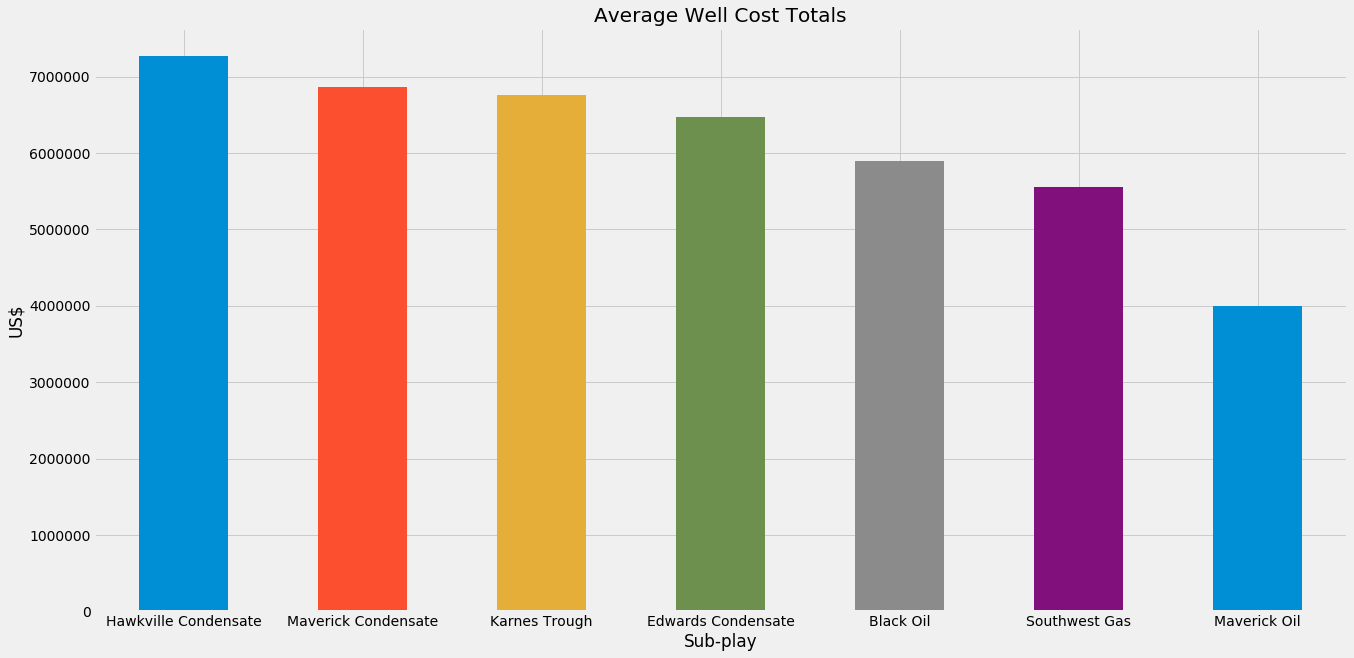

In [24]:
# Plot total cost cost averages
with plt.style.context('fivethirtyeight'):
    cost_avg['Well Cost Total (US$)'].plot(kind='bar',figsize=(20, 10))
    #cost_avg['cumulative'].plot(kind='line',figsize=(20, 10))
    # Add axis labels and title
    plt.title("Average Well Cost Totals")
    plt.ylabel("US$")

    # Show plot
    plt.xticks(rotation=0)
  # Save Figure
    plt.savefig("C:/Users/Sal/Desktop/avg_sort.png")
    
df = pd.DataFrame({'one': range(10), 'two': range(10, 20)})    plt.show()

In [ ]:
Well Cost Total (US$) = pd.DataFrame({'Well Cost Total (US$)': range(10), 'two': range(10, 20)})

ax = df['one'].plot()
ax2 = df['two'].plot(secondary_y=True)
ax2.set_ylim(-20, 50)
fig = ax.get_figure()
fig.savefig('test.png')